In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wallstreetbets-subreddit-submissions/wallstreetbets_submission.json
/kaggle/input/wallstreetbets-subreddit-submissions/investing_submission.json
/kaggle/input/wallstreetbets-subreddit-submissions/SecurityAnalysis_submission.json
/kaggle/input/wallstreetbets-subreddit-submissions/options_submission.json


In [3]:
def get_date(created):
    return dt.datetime.fromtimestamp(created)
def add_timestamp(df):
    # add a column of 'timestamp'
    _timestamp = df["created_utc"].apply(get_date)
    df = df.assign(timestamp = _timestamp)
    return df

In [5]:
## Checking missing values
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

## Exploring wallstreetbets_submission.json

In [4]:
# read the json data set
wsb_df = pd.read_json("../input/wallstreetbets-subreddit-submissions/wallstreetbets_submission.json",lines=True)

In [32]:
wsb_df = add_timestamp(wsb_df) # add timestamp

In [33]:
wsb_df.shape

(454025, 109)

In [7]:
wsb_df = wsb_df.dropna(axis=1, how='all') # drop columns with all values == Nan
wsb_df.shape

(454025, 109)

In [41]:
# explore several important features
wsb_df[['timestamp','title','selftext','upvote_ratio','score']].head()

,timestamp,title,selftext,upvote_ratio,score
0,2012-04-11 16:40:40,Earnings season is here. Place your bets.,I know that /r/investing is a great place for ...,NaN,13
1,2012-04-12 20:37:31,"GOOG - beat estimates, price barely rises.",,NaN,2
2,2012-04-16 22:29:37,My poorly timed opening position for AAPL earn...,"So I missed out on GOOG, which is probably a g...",NaN,12
3,2012-04-17 13:41:30,Anyone betting on VVUS and their potential app...,"I'm normally a long, but I've created a second...",NaN,1
4,2012-04-19 14:10:20,"EBAY posts higher 1Q net income and revenue, s...",,NaN,7


In [34]:
# generate a table to study missing values
missing_value_stat = missing_values_table(wsb_df)
missing_value_stat

Your selected dataframe has 109 columns.
There are 93 columns that have missing values.


,Missing Values,% of Total Values
top_awarded_type,454024,100.0
collections,454024,100.0
event_start,454021,100.0
event_is_live,454021,100.0
event_end,454021,100.0
...,...,...
contest_mode,39324,8.7
locked,9528,2.1
selftext,5319,1.2
retrieved_on,465,0.1


(array([ 6.,  8., 15.,  4.,  7.,  2.,  1.,  6.,  7., 37.]),
 array([  0.1 ,  10.09,  20.08,  30.07,  40.06,  50.05,  60.04,  70.03,
         80.02,  90.01, 100.  ]),
 <a list of 10 Patch objects>)

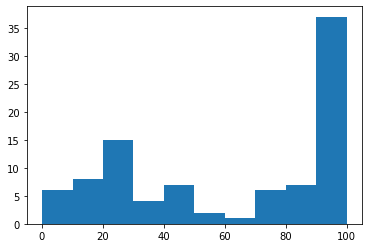

In [43]:
plt.hist(missing_value_stat['% of Total Values'])

(array([48.,  4.,  3.,  2.,  1.,  1.,  2.,  1.,  2.,  3.]),
 array([1.00000e+00, 4.41330e+03, 8.82560e+03, 1.32379e+04, 1.76502e+04,
        2.20625e+04, 2.64748e+04, 3.08871e+04, 3.52994e+04, 3.97117e+04,
        4.41240e+04]),
 <a list of 10 Patch objects>)

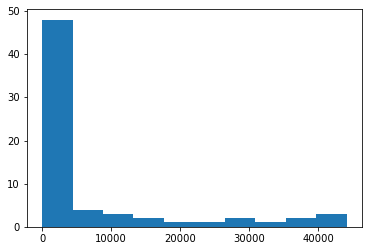

In [45]:
# study the length of the title
title_lengths = wsb_df['title'].str.split().apply(len).value_counts()
plt.hist(title_lengths)

## Explore investing_submissions.json

In [37]:
inves_df = pd.read_json("../input/wallstreetbets-subreddit-submissions/investing_submission.json",lines=True)

In [44]:
inves_df = add_timestamp(inves_df)

In [45]:
inves_df.shape

(210151, 105)

In [49]:
inves_df = inves_df.dropna(axis=1, how='all')